In [63]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
from functools import reduce

In [31]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [61]:
metabolite_data = pd.read_csv("../MCF7_removal/Metabolomics_data_noMCF7.csv", index_col = "ionIdx")
sample_reference = pd.read_csv("../../AZ_data/Sample_reference_table.csv")
metabolite_reference = pd.read_csv("../../AZ_data/Metabolite_reference_table.csv")

In [33]:
metabolite_data = metabolite_data.drop("ionMz", axis =1)

In [34]:
cellline_mean_zscore = metabolite_data.transpose().apply(lambda x: (x-x.mean())/x.std(), axis =1).transpose()

In [35]:
cellline_mean_zscore["average"] = cellline_mean_zscore.median(axis =1)
cellline_mean_zscore = cellline_mean_zscore.sort_values(by= "average")
cellline_mean_zscore['rank'] = cellline_mean_zscore['average'].rank(method='average', ascending = True)

In [36]:
cellline_mean_zscore

,1,2,3,4,5,6,7,8,9,10,...,1289,1290,1291,1292,1293,1294,1295,1296,average,rank
ionIdx,,,,,,,,,,,,,,,,,,,,,
1053,-0.159989,-0.170348,-0.115105,-0.115787,-0.163353,-0.169676,-0.132069,-0.131911,-0.128322,-0.133624,...,-0.147565,-0.147873,-0.170457,-0.171638,-0.171993,-0.171789,-0.131016,-0.130969,-0.157156,1.0
1038,-0.160471,-0.169689,-0.114272,-0.114619,-0.162271,-0.169252,-0.130868,-0.132535,-0.129507,-0.133200,...,-0.147637,-0.147843,-0.168503,-0.171305,-0.172274,-0.172142,-0.131395,-0.131407,-0.157113,2.0
727,-0.161653,-0.170405,-0.115458,-0.115455,-0.163866,-0.170809,-0.131016,-0.132234,-0.128948,-0.133858,...,-0.146342,-0.146407,-0.170509,-0.171961,-0.170303,-0.170347,-0.130843,-0.129697,-0.156539,3.0
968,-0.162748,-0.170412,-0.114362,-0.114187,-0.164180,-0.171200,-0.131546,-0.132226,-0.127695,-0.131301,...,-0.145940,-0.145883,-0.171419,-0.172782,-0.171296,-0.170591,-0.130773,-0.130794,-0.156486,4.0
527,-0.159828,-0.166985,-0.113964,-0.114728,-0.162182,-0.168405,-0.131376,-0.132076,-0.128885,-0.132807,...,-0.147553,-0.148046,-0.169240,-0.171734,-0.171867,-0.171995,-0.131137,-0.130224,-0.156341,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,2.963053,3.107849,5.208236,5.431155,2.859480,2.958470,4.497885,4.633695,4.111456,4.195886,...,2.320136,2.318290,7.521664,7.205408,2.243514,2.247783,4.174521,4.070647,5.084151,1095.0
759,7.728409,8.039412,6.610524,6.774593,7.831592,7.978217,7.875195,8.116895,6.067011,6.268674,...,9.152600,9.347323,7.949847,7.773274,8.767814,8.784393,9.655136,9.801556,9.334849,1096.0
383,7.529384,8.232577,5.184308,5.029463,8.106308,8.622530,9.261047,9.201499,6.828537,7.289119,...,20.400784,20.308189,8.565630,8.799783,19.806888,19.852730,16.153050,16.232742,11.187419,1097.0


In [37]:
metabolite_data_avg = metabolite_data.copy()
metabolite_data_avg["average"] = metabolite_data_avg.median(axis =1)
metabolite_data_avg = metabolite_data_avg.sort_values(by= "average")
metabolite_data_avg['rank'] = metabolite_data_avg['average'].rank(method='average', ascending = True)

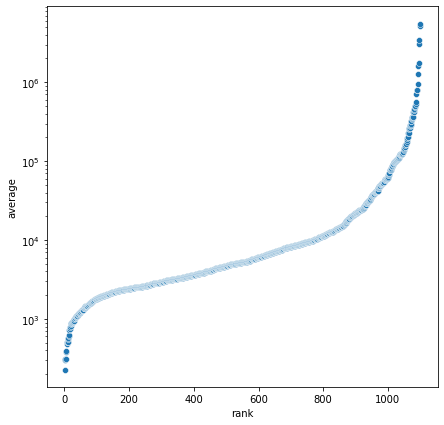

In [38]:
f, ax = plt.subplots(figsize=(7, 7))
#ax.set(yscale = "log")
g = sns.scatterplot(x = "rank", y = "average", data = metabolite_data_avg)
plt.yscale("log")

In [39]:
pathway_annotations = pd.read_csv("../../Metabolic_pathways/Core_Metabolic_pathways_SMPDB.csv")

In [49]:
cellline_mapping = pd.read_csv("../MCF7_removal/Celllines_mapping_manual_noMCF7.csv")

In [50]:
cellline_mapping = cellline_mapping.sort_values(by = "dsIdx", ascending = True)

cellline_mapping_ids = cellline_mapping["ID"]
cellline_mapping_ids = cellline_mapping_ids.to_frame().transpose()
cellline_mapping_ids.columns = metabolite_data.columns

In [53]:
cellline_labelled_metabolitedata = pd.concat([metabolite_data, cellline_mapping_ids])
cellline_labelled_metabolitedata_T = cellline_labelled_metabolitedata.transpose()

In [54]:
cellline_labelled_metabolitedata_T

,1,2,3,4,5,6,7,8,9,10,...,1091,1092,1093,1094,1095,1096,1097,1098,1099,ID
1,10755,3507,61335,4178,4124,3635,7436,6249,5869,15217,...,2867,3537,765,5016,2752,-286,1574,1166,1422,SHP-77
2,9608,3938,64959,4586,6969,10746,4955,3924,5895,17424,...,3004,3368,1338,4619,2993,-355,1171,1054,1700,SHP-77
3,9434,3836,78616,5914,11827,8225,3932,3439,3896,17087,...,2780,2599,838,6795,1722,-348,1039,1466,1578,PC-9
4,9720,4311,78619,4963,11233,7902,2664,3453,4233,17392,...,3192,3097,513,7075,2304,167,576,1673,1832,PC-9
5,8356,4534,58873,4268,3640,8438,3359,2247,11232,18843,...,3051,3806,764,7155,2587,-326,1868,1093,1829,SHP-77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292,10677,1474,27913,2648,2642,3252,2675,1925,2957,18183,...,3112,3687,1701,7205,3057,182,1130,1171,1520,EKVX
1293,6683,757,22271,7556,2598,10384,2910,2069,1963,10772,...,4542,3653,2811,7935,3320,1359,181,2374,2077,DU4475
1294,6125,1059,31315,5147,1084,4176,2525,2166,1638,10811,...,4383,3810,3523,8299,3018,867,288,2298,2411,DU4475
1295,5018,2668,67741,5106,3020,2582,981,1156,2563,13690,...,3010,2695,1839,9844,1607,1535,204,1034,898,SF539


In [55]:
mean_expression_list = []
for item in set(cellline_labelled_metabolitedata_T["ID"].tolist()):
    subset = cellline_labelled_metabolitedata_T[cellline_labelled_metabolitedata_T["ID"] == item]
    subset = subset.drop("ID", axis =1)
    subset_T = subset.transpose()
    mean_expression = subset_T.mean(axis=1)
    mean_expression = mean_expression.rename(item)
    mean_expression_list.append(mean_expression)

In [56]:
mean_metabolite_expression = pd.concat(mean_expression_list, axis =1)
mean_metabolite_expression = mean_metabolite_expression.loc[:, mean_metabolite_expression.columns.notnull()]

In [57]:
mean_metabolite_expression.to_csv("Mean_metaboliteexpressionbycellline.csv")

In [58]:
pathway_names = pathway_annotations["Pathway name"].tolist()

In [59]:
celline_list =  set(cellline_labelled_metabolitedata_T["ID"].tolist())
celline_list = {x for x in celline_list if pd.notna(x)}
short_list = list(celline_list)[:10]

In [62]:
# Go through groups and order metabolites by expression rank
pathway_means_dfs = []
pathway_sums_dfs = []
count = 1
for label in celline_list:
    print("Analysing label " + str(label) + " %s/%s" %(str(count), str(len(celline_list))))
    count+=1
    #replaces spaces in name for folder
    label_replaced = label.split("[")[0]
    label_replaced = label_replaced.replace(" ", "_")
    # Take cells in one label
    Path("./Cell_Line_pathways/cluster_" + str(label_replaced)).mkdir(parents=True, exist_ok=True)
    celllines = cellline_labelled_metabolitedata_T[cellline_labelled_metabolitedata_T["ID"] == label]
    celllines = celllines.drop("ID", axis =1).transpose()
    # Assign rank
    celllines["average"] = celllines.median(axis =1)
    celllines = celllines.sort_values(by= "average")
    celllines['rank'] = celllines['average'].rank(method='average', ascending = True)
    pathway_sums = []
    pathway_means = []
    
    #iterate through pathways
    for pathway in pathway_names:
        pathway_data = pathway_annotations[pathway_annotations["Pathway name"] == pathway]
        pathwayid, pathwayname = pathway_data["Pathway ID"].values[0], pathway_data["Pathway name"].values[0]
        pathwayname = pathwayname.replace("/", "_")
        # find the appropriate pathway file
        pathwayfile = ("../../Metabolic_pathways/SMPDB_pathways/" + pathwayid + "_metabolites.csv")
        if Path(pathwayfile).is_file():
            pathway = pd.read_csv(pathwayfile)
            metabolite_ids = pathway["HMDB ID"][~pathway["HMDB ID"].isnull()].tolist()
            ## We have to transform the metabolite ids because they dont match
            new_metabolite_ids = []
            for item in metabolite_ids:
                newid = "HMDB" + item.split("HMDB")[1][2:]
                new_metabolite_ids.append(newid)
            #subset the cell values by this pathway only
                metabolite_idarray = metabolite_reference[metabolite_reference["id"].isin(new_metabolite_ids)]
                metabolite_idlist = metabolite_idarray["ionIdx"].tolist()
            
            ## Calculate rank values for bulk data   
            metabolite_dataframe = metabolite_data_avg[metabolite_data_avg.index.isin(metabolite_idlist)]
            metabolite_values = metabolite_dataframe["rank"].tolist()
            metabolite_dataframe_avg = metabolite_dataframe[["average", "rank"]]
            ### Now have metabolite ranks for the pathway of interest in the bulk data
            
            ## Calculate rank values for cell line data
            metabolite_specific_dataframe = celllines[celllines.index.isin(metabolite_idlist)]
            
                        
            ##### Save csv of cellline specific metabolic pathway #####
            metabolite_specific_dataframe.to_csv("./Cell_Line_pathways/cluster_" + str(label_replaced) + "/" + pathwayname + ".csv")
            
            
            metabolite_specific_dataframe_avg = metabolite_specific_dataframe[["average", "rank"]]
            metabolite_specific_dataframe_avg.columns = ["average_cellline", "rank_cellline"]
            
            #combine dataframes from the bulk and cellline
            combined_frame = pd.concat([metabolite_dataframe_avg, metabolite_specific_dataframe_avg], axis =1)
            #calculate rank changes
            combined_frame["rankchange"] = combined_frame["rank_cellline"] - combined_frame["rank"]
            
            #calculate rank statistics
            mean_ranksum = combined_frame["rankchange"].mean()
            sum_ranksum = sum(combined_frame["rankchange"])
            
            pathway_sums.append([pathwayname, sum_ranksum])
            pathway_means.append([pathwayname, mean_ranksum])
    pathway_sums_df = pd.DataFrame(pathway_sums, columns = ["Pathway", "sum_ranksum_label_" + str(label_replaced)])
    pathway_mean_df = pd.DataFrame(pathway_means, columns = ["Pathway", "mean_ranksum_label_" + str(label_replaced)])
    
    pathway_sums_dfs.append(pathway_sums_df)
    pathway_means_dfs.append(pathway_mean_df)
pathway_sums_alllabels = reduce(lambda left,right: pd.merge(left,right,on='Pathway'), pathway_sums_dfs)
pathway_means_alllabels = reduce(lambda left,right: pd.merge(left,right,on='Pathway'), pathway_means_dfs)

Analysing label DMS 114 1/173
Analysing label NCI-H2135 2/173
Analysing label NCI-H2073 3/173
Analysing label UM-UC-3 4/173
Analysing label NCI-H23 5/173
Analysing label OVCAR-8 6/173
Analysing label COLO 205 7/173
Analysing label NCI-H510A 8/173
Analysing label HT-1376 9/173
Analysing label Calu-1 10/173
Analysing label NCI-H1755 11/173
Analysing label 647V 12/173
Analysing label IGROV-1 13/173
Analysing label K-562 14/173
Analysing label RPMI-8226 15/173
Analysing label NCI-H358 16/173
Analysing label HCT 116 17/173
Analysing label NCI-H3255 18/173
Analysing label M14 19/173
Analysing label OVCAR-3 20/173
Analysing label HT-1197 21/173
Analysing label PC-9 22/173
Analysing label NCI-H838 23/173
Analysing label RXF 393L 24/173
Analysing label NCI-H226 25/173
Analysing label DMS 53 26/173
Analysing label HCC38 27/173
Analysing label NCI-H1734 28/173
Analysing label NCI-H596 29/173
Analysing label CCRF-CEM 30/173
Analysing label NCI-H1650 31/173
Analysing label MDA-MB-468 32/173
Analysi

NameError: name 'reduce' is not defined

In [64]:
pathway_sums_alllabels = reduce(lambda left,right: pd.merge(left,right,on='Pathway'), pathway_sums_dfs)
pathway_means_alllabels = reduce(lambda left,right: pd.merge(left,right,on='Pathway'), pathway_means_dfs)

In [65]:
pathway_sums_alllabels.to_csv("./Cell_Line_pathways/Pathway_rankchange_sums_celllines.csv")
pathway_means_alllabels.to_csv("./Cell_Line_pathways/Pathway_rankchange_means_celllines.csv")

In [67]:
pathway_sums_alllabels

,Pathway,sum_ranksum_label_DMS_114,sum_ranksum_label_NCI-H2135,sum_ranksum_label_NCI-H2073,sum_ranksum_label_UM-UC-3,sum_ranksum_label_NCI-H23,sum_ranksum_label_OVCAR-8,sum_ranksum_label_COLO_205,sum_ranksum_label_NCI-H510A,sum_ranksum_label_HT-1376,...,sum_ranksum_label_SHP-77,sum_ranksum_label_NCI-H2444,sum_ranksum_label_A-549,sum_ranksum_label_NCI-H661,sum_ranksum_label_HDQ-P1,sum_ranksum_label_BFTC-905,sum_ranksum_label_HT-29,sum_ranksum_label_HCC1187,sum_ranksum_label_NCI-H2172,sum_ranksum_label_SF539
0,Alanine Metabolism,23.5,-29.0,-289.0,171.0,-14.5,-143.0,-287.0,-298.0,199.0,...,-24.0,161.0,71.5,-397.0,-175.0,59.0,25.0,-17.0,-547.0,-188.0
1,Alpha Linolenic Acid and Linoleic Acid Metabolism,603.0,-569.0,-604.0,473.0,499.0,924.0,158.0,1610.0,-620.0,...,-849.0,92.0,-130.0,218.0,1733.0,-407.0,-633.0,-677.0,168.0,354.0
2,Amino Sugar Metabolism,-6.0,-263.0,443.0,-234.0,-552.0,-766.0,-119.0,-451.5,136.0,...,679.5,321.0,268.0,188.0,-155.0,157.0,340.0,-275.0,-813.0,-533.5
3,Ammonia Recycling,-242.0,281.0,403.0,-366.0,-215.0,-488.0,-380.0,-448.0,-405.0,...,92.0,34.0,-293.0,-298.0,-269.0,-244.0,188.0,558.5,-92.5,-428.0
4,Androgen and Estrogen Metabolism,-326.5,-494.0,121.0,-40.0,-135.0,-151.0,122.5,5.0,-988.0,...,-743.0,322.0,-226.0,85.0,-24.0,-382.0,286.0,11.5,275.5,312.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Urea Cycle,-290.0,141.0,-31.0,-49.0,-444.5,-261.0,-280.0,-345.0,-567.0,...,266.0,537.0,-155.5,-346.0,-39.0,228.0,-52.0,149.0,-547.0,-112.0
96,"Valine, Leucine, and Isoleucine Degradation",378.0,-663.0,346.5,-139.0,-492.0,-1203.0,36.5,-455.0,-183.0,...,1204.0,657.0,567.0,-447.0,-452.5,336.5,509.0,-390.5,-977.0,-1325.5
97,Vitamin B6 Metabolism,-287.0,32.5,161.0,-187.0,-49.0,-178.0,2.0,-67.0,-4.0,...,252.0,-34.0,281.0,-132.0,-253.0,-159.0,-130.0,35.5,296.0,-222.0
98,Vitamin K Metabolism,-367.0,-392.0,236.5,-176.0,-60.0,-534.0,73.0,-23.0,12.0,...,225.0,-292.0,184.0,-121.0,-223.0,10.0,98.0,-183.5,201.0,-627.0
